# Classifying movie reviews: a binary classification example

Design a neural network to perform two-class classification or _binary classification_ , of reviews form IMDB movie reviews dataset, to determine wether the reviews are positive or negative. We will use the Python library Keras to perform the classification

## Problem Statement

Given a review, find the probability of it being a positive review or a negative review using deep neural networks.

## The IMDB Dataset

The IMDB dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database. They are split into 25000 reviews each for training and testing. Each set contains equal number (50%) of positive and negative reviews.

The IMDB dataset comes packaged with Keras. It consists of reviews and their corresponding labels (0 for _negative_ and 1 for _positive_ review). The reviews are a sequence of words. They come preprocessed as sequence of integers, where each integer stands for a specific word in the dictionary.

The IMDB datset can be loaded directly from Keras and will usually download about 80 MB on your machine. 

In [38]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D


max_words = 10000


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)


max_sequence_length = 500
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)


model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Generate predictions


Epoch 1/10
391/391 [==============================] - 6s 15ms/step - loss: 0.4626 - accuracy: 0.7716 - val_loss: 0.3158 - val_accuracy: 0.8640
Epoch 2/10
391/391 [==============================] - 8s 19ms/step - loss: 0.2413 - accuracy: 0.9047 - val_loss: 0.2800 - val_accuracy: 0.8819
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.1583 - accuracy: 0.9434 - val_loss: 0.3025 - val_accuracy: 0.8775
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 0.0949 - accuracy: 0.9701 - val_loss: 0.3507 - val_accuracy: 0.8716
Epoch 5/10
391/391 [==============================] - 8s 19ms/step - loss: 0.0505 - accuracy: 0.9863 - val_loss: 0.4067 - val_accuracy: 0.8676
Epoch 6/10
391/391 [==============================] - 7s 18ms/step - loss: 0.0233 - accuracy: 0.9954 - val_loss: 0.4649 - val_accuracy: 0.8657
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 0.0091 - accuracy: 0.9989 - val_loss: 0.5173 - val_accuracy: 0.8658

782/782 [==============================] - 1s 1ms/step


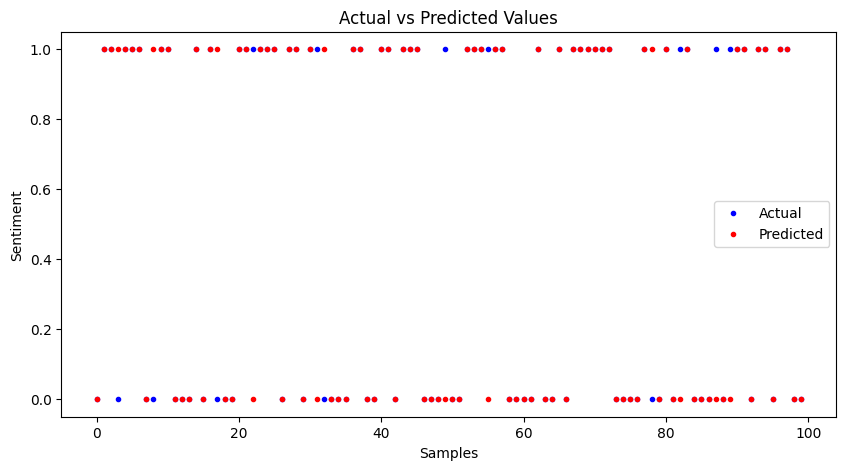

782/782 [==============================] - 1s 1ms/step - loss: 0.6263 - accuracy: 0.8656
Test Loss: 0.626289963722229
Test Accuracy: 0.8656399846076965


In [48]:
# Generate predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], 'b.', label='Actual')
plt.plot(y_pred[:100], 'r.', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Sentiment')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

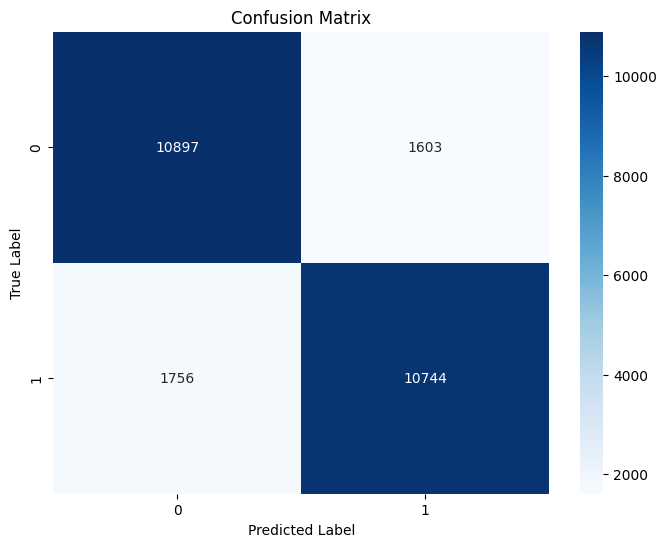

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [46]:
# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_rep)